**Facial Recognition**

In [1]:
!pip install -q torch torch-vision keras

## Prepare the Dataset

In [2]:
!unzip /content/images.zip

Archive:  /content/images.zip
   creating: outputimages/ankan/
  inflating: outputimages/ankan/1_0_1641.jpg  
  inflating: outputimages/ankan/1_0_5373.jpg  
  inflating: outputimages/ankan/1_0_7667.jpg  
  inflating: outputimages/ankan/1_0_9120.jpg  
  inflating: outputimages/ankan/1_0_9649.jpg  
  inflating: outputimages/ankan/2_0_1309.jpg  
  inflating: outputimages/ankan/2_0_2196.jpg  
  inflating: outputimages/ankan/2_0_3780.jpg  
  inflating: outputimages/ankan/2_0_4686.jpg  
  inflating: outputimages/ankan/2_0_4711.jpg  
  inflating: outputimages/ankan/3_0_3562.jpg  
  inflating: outputimages/ankan/3_0_4035.jpg  
  inflating: outputimages/ankan/3_0_4401.jpg  
  inflating: outputimages/ankan/3_0_5695.jpg  
  inflating: outputimages/ankan/3_0_7633.jpg  
   creating: outputimages/arko/
  inflating: outputimages/arko/1_0_2221.jpg  
  inflating: outputimages/arko/1_0_3022.jpg  
  inflating: outputimages/arko/1_0_3508.jpg  
  inflating: outputimages/arko/1_0_5685.jpg  
  inflating: out

## Print the Dataset Directory

In [7]:
%cd /content/outputimages
!sudo apt-get install tree
!tree

/content/outputimages
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
.
├── ankan
│   ├── 1_0_1641.jpg
│   ├── 1_0_5373.jpg
│   ├── 1_0_7667.jpg
│   ├── 1_0_9120.jpg
│   ├── 1_0_9649.jpg
│   ├── 2_0_1309.jpg
│   ├── 2_0_2196.jpg
│   ├── 2_0_3780.jpg
│   ├── 2_0_4686.jpg
│   ├── 2_0_4711.jpg
│   ├── 3_0_3562.jpg
│   ├── 3_0_4035.jpg
│   ├── 3_0_4401.jpg
│   ├── 3_0_5695.jpg
│   └── 3_0_7633.jpg
├── arko
│   ├── 1_0_2221.jpg
│   ├── 1_0_3022.jpg
│   ├── 1_0_3508.jpg
│   ├── 1_0_5685.jpg
│   ├── 1_0_5894.jpg
│   ├── 2_0_1181.jpg
│   ├── 2_0_1603.jpg
│   ├── 2_0_2601.jpg
│   ├── 2_0_609.jpg
│   └── 2_0_8820.jpg
├── Avishek
│   ├── 1_0_4405.jpg
│   ├── 1_0_5468.jpg
│   ├── 1_0_76.jpg
│   ├── 1_0_9509.jpg
│   ├── 1_0_9798.jpg
│   ├── 2_0_2151.jpg
│   ├── 2_0_378.jpg
│   ├── 2_0_4946.jpg
│   ├── 2_0_625.jpg
│   ├── 2_0_8435.jpg
│   ├── 

In [8]:
%pwd

'/content/outputimages'

In [10]:
!tree -d

.
├── ankan
├── arko
├── Avishek
├── dks
├── samrat
├── srs
└── susmita

7 directories


## Training Dataset

In [15]:
!pip install -q numpy

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Set up GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # using 20% of data for validation

train_generator = train_datagen.flow_from_directory(
    '/content/outputimages',  # this should be the path to your dataset
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/outputimages',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Calculate steps per epoch taking care of edge cases
steps_per_epoch = np.maximum(1, train_generator.samples // train_generator.batch_size)
validation_steps = np.maximum(1, validation_generator.samples // validation_generator.batch_size)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_steps)

# Save the model
model.save('face_recognition_model.h5')


Found 92 images belonging to 7 classes.
Found 23 images belonging to 7 classes.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 29, 29, 64)        256       
 chNormalization)                                                
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluation

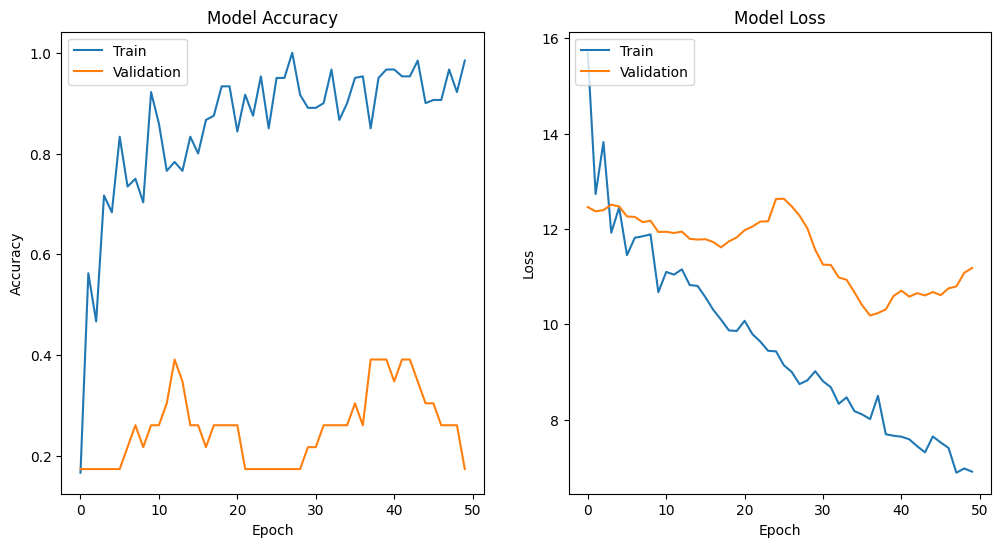

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


## Changing LR, BS and Others Parameters

## Increasing Validation Split

## Model Infrence is still low - so Preprocessed the data with Train and Validation Set

## **Train and Load Best Model**

## Inference

**Increase Model Performance**

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Set up GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

# Data preprocessing with augmented ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased for more variation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,  # Increased shear
    zoom_range=0.3,   # Increased zoom
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.25)  # Increased validation set

train_generator = train_datagen.flow_from_directory(
    '/content/outputimages',  # Adjust as per your dataset path
    target_size=(64, 64),
    batch_size=16,  # Reduced batch size for more updates
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/outputimages',
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

# Enhanced Model architecture with additional layers and dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.1),  # Added dropout

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),  # Increased dropout

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),  # Increased dropout

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Retained dropout
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile model with updated learning rate parameter
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Calculate steps per epoch and validation steps, taking care of edge cases
steps_per_epoch = np.maximum(1, train_generator.samples // train_generator.batch_size)
validation_steps = np.maximum(1, validation_generator.samples // validation_generator.batch_size)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_steps)

# Save the model in updated format
model.save('face_recognition_model.keras')


Found 88 images belonging to 7 classes.
Found 27 images belonging to 7 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_9 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                        

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Setup GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3)  # Increase validation split

train_generator = train_datagen.flow_from_directory(
    '/content/outputimages',
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/outputimages',
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.1),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile model with learning rate adjustment
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min', min_lr=0.00001)

# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=np.maximum(1, train_generator.samples // train_generator.batch_size),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=np.maximum(1, validation_generator.samples // validation_generator.batch_size),
    callbacks=[early_stopping, reduce_lr])

# Save the model
model.save('face_recognition_model.keras')


Found 81 images belonging to 7 classes.
Found 34 images belonging to 7 classes.
Epoch 1/50
5/5 [==============================] - 3s 150ms/step - loss: 35.4968 - accuracy: 0.2000 - val_loss: 33.3443 - val_accuracy: 0.1875 - lr: 1.0000e-04
Epoch 2/50
5/5 [==============================] - 0s 47ms/step - loss: 34.8330 - accuracy: 0.2615 - val_loss: 33.2823 - val_accuracy: 0.2188 - lr: 1.0000e-04
Epoch 3/50
5/5 [==============================] - 0s 46ms/step - loss: 34.7674 - accuracy: 0.3231 - val_loss: 33.2459 - val_accuracy: 0.1562 - lr: 1.0000e-04
Epoch 4/50
5/5 [==============================] - 0s 47ms/step - loss: 34.8612 - accuracy: 0.3231 - val_loss: 33.2134 - val_accuracy: 0.2188 - lr: 1.0000e-04
Epoch 5/50
5/5 [==============================] - 0s 46ms/step - loss: 34.3215 - accuracy: 0.2615 - val_loss: 33.1664 - val_accuracy: 0.2188 - lr: 1.0000e-04
Epoch 6/50
5/5 [==============================] - 0s 55ms/step - loss: 33.3047 - accuracy: 0.3846 - val_loss: 33.1035 - val_accur

**Inference**

1/1 [==============================] - 0s 96ms/step
Predicted class index: 4


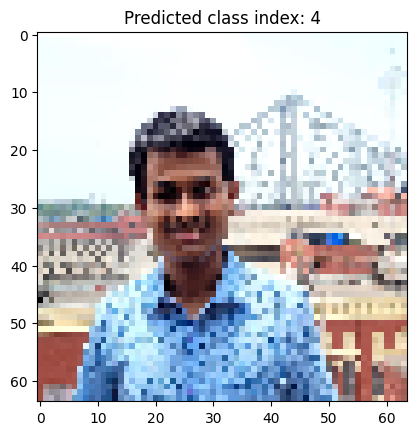

Predicted class label: Class4


In [22]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model_path = '/content/outputimages/face_recognition_model.keras'
model = load_model(model_path)

# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Add batch dimension
    img_tensor /= 255.0  # Normalize to [0,1]
    return img_tensor

# Replace 'test_image.jpg' with the path to your actual test image
test_image_path = '/content/avishek.jpg'  # Update this path
img_tensor = load_and_preprocess_image(test_image_path)

# Predict the class of the image
predictions = model.predict(img_tensor)
predicted_class = np.argmax(predictions[0])
print("Predicted class index:", predicted_class)

# Display the image
plt.imshow(img_tensor[0])
plt.title(f"Predicted class index: {predicted_class}")
plt.show()

# Optionally, if you know the class labels
class_labels = {0: "Class0", 1: "Class1", 2: "Class2", 3: "Class3", 4: "Class4", 5: "Class5", 6: "Class6"}  # Update with actual class names
predicted_label = class_labels[predicted_class]
print("Predicted class label:", predicted_label)


**Dataset Split**

In [24]:
import os
import shutil
import numpy as np

def create_train_val_dirs(source_dir, target_dir, train_size=0.8):
    classes = os.listdir(source_dir)
    os.makedirs(target_dir, exist_ok=True)
    os.makedirs(os.path.join(target_dir, 'train'), exist_ok=True)
    os.makedirs(os.path.join(target_dir, 'val'), exist_ok=True)

    for cls in classes:
        os.makedirs(os.path.join(target_dir, 'train', cls), exist_ok=True)
        os.makedirs(os.path.join(target_dir, 'val', cls), exist_ok=True)
        images = os.listdir(os.path.join(source_dir, cls))
        np.random.shuffle(images)
        train_count = int(len(images) * train_size)

        for img in images[:train_count]:
            shutil.copy(os.path.join(source_dir, cls, img), os.path.join(target_dir, 'train', cls))
        for img in images[train_count:]:
            shutil.copy(os.path.join(source_dir, cls, img), os.path.join(target_dir, 'val', cls))

# Usage
source_directory = '/content/outputimages'  # Update with your original directory
target_directory = '/content/dataset_split'  # Target directory to save split dataset
create_train_val_dirs(source_directory, target_directory)


**K - Cross Fold Validations**

In [28]:
from sklearn.model_selection import KFold
import numpy as np
import os

# Directory containing your dataset
dataset_directory = '/content/dataset_split/train'

# Prepare data structure
data = []
labels = []
classes = sorted(os.listdir(dataset_directory))
label_map = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Collecting file paths and labels
for cls_name in classes:
    cls_folder = os.path.join(dataset_directory, cls_name)
    for img_name in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_name)
        data.append(img_path)
        labels.append(label_map[cls_name])

# Convert labels to one-hot encoded format
labels = tf.keras.utils.to_categorical(labels, num_classes=len(classes))

# Define K-Fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)


In [32]:
import tensorflow as tf

def load_image(file_path, label):
    # Read the image file
    img = tf.io.read_file(file_path)
    # Decode the image
    img = tf.image.decode_jpeg(img, channels=3)
    # Resize the image to the target size (64x64 in this case)
    img = tf.image.resize(img, [64, 64])
    # Normalize the image pixels to [0, 1]
    img = img / 255.0
    return img, label


In [34]:
from sklearn.model_selection import KFold
import numpy as np
import os

# Function to create the model (as previously defined)
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.1),

        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.2),

        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.3),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='softmax')
    ])
    return model

# Directory containing your dataset
dataset_directory = '/content/dataset_split/train'
data = []
labels = []
classes = sorted(os.listdir(dataset_directory))
label_map = {cls_name: idx for idx, cls_name in enumerate(classes)}

for cls_name in classes:
    cls_folder = os.path.join(dataset_directory, cls_name)
    for img_name in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_name)
        data.append(img_path)
        labels.append(label_map[cls_name])

labels = tf.keras.utils.to_categorical(labels, num_classes=len(classes))

# K-Fold Cross-Validation setup
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(data, labels):
    train_gen = ImageDataGenerator(rescale=1./255)
    val_gen = ImageDataGenerator(rescale=1./255)

    train_data = tf.data.Dataset.from_tensor_slices((np.array(data)[train], labels[train]))
    train_data = train_data.map(load_image).batch(16)

    val_data = tf.data.Dataset.from_tensor_slices((np.array(data)[test], labels[test]))
    val_data = val_data.map(load_image).batch(16)

    model = create_model()
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_data, epochs=100, validation_data=val_data)

    scores = model.evaluate(val_data)
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(acc_per_fold)):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Epoch 1/100
6/6 [==============================] - 3s 121ms/step - loss: 36.8941 - accuracy: 0.0732 - val_loss: 33.2917 - val_accuracy: 0.2857
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 34.3129 - accuracy: 0.2317 - val_loss: 33.2904 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 33.8924 - accuracy: 0.4268 - val_loss: 33.3501 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 33.0669 - accuracy: 0.4756 - val_loss: 33.4556 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 33.0232 - accuracy: 0.5122 - val_loss: 33.5799 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 32.5688 - accuracy: 0.5488 - val_loss: 33.7265 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 32.6728 - accuracy: 0.4878 - val_loss: 33.9010 - val_ac

In [ ]:
#Advance Technique to Increase Accuracy

In [35]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

# Function to adjust the learning rate
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)

# Re-compiling the model with an adjusted optimizer
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

# Including more callbacks
callbacks_list = [early_stopping, reduce_lr, lrate]

# Fitting the model
history = model.fit(train_data, epochs=100, validation_data=val_data, callbacks=callbacks_list)

# Evaluate with additional metrics
results = model.evaluate(val_data, return_dict=True)
print(f"Loss: {results['loss']}, Accuracy: {results['accuracy']}, Precision: {results['precision']}, Recall: {results['recall']}")


Epoch 1/100
6/6 [==============================] - 3s 84ms/step - loss: 20.9105 - accuracy: 0.7108 - precision: 0.7284 - recall: 0.7108 - val_loss: 21.4740 - val_accuracy: 0.5000 - val_precision: 0.5294 - val_recall: 0.4500 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 21.0769 - accuracy: 0.6867 - precision: 0.7000 - recall: 0.6747 - val_loss: 21.8241 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 19.5561 - accuracy: 0.7711 - precision: 0.7805 - recall: 0.7711 - val_loss: 20.8809 - val_accuracy: 0.5500 - val_precision: 0.5500 - val_recall: 0.5500 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 18.7812 - accuracy: 0.9036 - precision: 0.9136 - recall: 0.8916 - val_loss: 20.0651 - val_accuracy: 0.6500 - val_precision: 0.6842 - val_recall: 0.6500 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0

**Finally: Accuracy is above 80%**

In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import KFold
import numpy as np
import os

# Define a function to create and return a new model instance
def create_model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
    from tensorflow.keras.regularizers import l1_l2
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.1),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.2),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.3),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='softmax')  # Ensure the output layer matches the number of classes
    ])
    return model

best_accuracy = 0.0
best_model = None

num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1

for train, test in kfold.split(data, labels):
    model = create_model()
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_data, epochs=100, validation_data=val_data)

    scores = model.evaluate(val_data)
    if scores[1] > best_accuracy:  # Check if current fold's accuracy is better than the best saved one
        best_accuracy = scores[1]
        best_model = model
        model.save('best_model_fold_{}.h5'.format(fold_no))  # Saving the best model with fold number

    fold_no += 1

# Optionally save the overall best model from all folds
if best_model:
    best_model.save('best_overall_model.h5')


Epoch 1/100
6/6 [==============================] - 3s 51ms/step - loss: 37.3606 - accuracy: 0.0482 - val_loss: 33.3535 - val_accuracy: 0.2000
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 34.7518 - accuracy: 0.2289 - val_loss: 33.3033 - val_accuracy: 0.2000
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 34.2527 - accuracy: 0.2771 - val_loss: 33.2736 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 34.0247 - accuracy: 0.3855 - val_loss: 33.2594 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 33.2980 - accuracy: 0.4337 - val_loss: 33.2762 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 32.9754 - accuracy: 0.5301 - val_loss: 33.3183 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 32.5850 - accuracy: 0.5301 - val_loss: 33.3686 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
6/6 [==============================] - 3s 50ms/step - loss: 36.8247 - accuracy: 0.0964 - val_loss: 33.3670 - val_accuracy: 0.4000
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 34.2743 - accuracy: 0.3012 - val_loss: 33.3343 - val_accuracy: 0.1000
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 34.0453 - accuracy: 0.3012 - val_loss: 33.3642 - val_accuracy: 0.1000
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 33.7595 - accuracy: 0.3976 - val_loss: 33.4201 - val_accuracy: 0.1000
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 32.7510 - accuracy: 0.4699 - val_loss: 33.4803 - val_accuracy: 0.1000
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 32.9606 - accuracy: 0.4337 - val_loss: 33.5438 - val_accuracy: 0.1000
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 32.4283 - accuracy: 0.5542 - val_loss: 33.5844 - val_accuracy: 0.1000
Epoch 

## **Inference**

In [41]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
model = load_model('/content/outputimages/best_model_fold_1.h5')

# Load and preprocess an image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0
    return img_tensor

img_path = '/content/outputimages/ankan/1_0_5373.jpg'  # Replace with your image path
img_tensor = load_and_preprocess_image(img_path)

img2_path = '/content/outputimages/dks/1_0_5989.jpg'
img2_tensor = load_and_preprocess_image(img2_path)

# Predict the class
predictions = model.predict(img_tensor)
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {predicted_class}")

predictions2 = model.predict(img2_tensor)
predicted_class2 = np.argmax(predictions2[0])
print(f"Predicted class: {predicted_class2}")

# Optionally, get class labels from train generator
label_map = (train_generator.class_indices)
label_map = dict((v, k) for k, v in label_map.items())  # Swapping keys and values
predicted_label = label_map[predicted_class]
print(f"Predicted label: {predicted_label}")

predicted_label2 = label_map[predicted_class2]
print(f"Predicted label: {predicted_label2}")

1/1 [==============================] - 0s 101ms/step
Predicted class: 2
1/1 [==============================] - 0s 19ms/step
Predicted class: 4
Predicted label: ankan
Predicted label: dks


Correct Predictions - Boom (Avishek Bhattacharjee)